In [1]:
# import pandas_datareader as dr

In [2]:
# api_key = "2a4b0283********************23c5da9f26c"

In [3]:
# data = dr.get_data_tiingo('AAPL' , api_key = api_key)

In [4]:
# data.to_csv("AAPL.csv")

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv("AAPL.csv")

In [7]:
# Display basic information
print("Data loaded successfully!")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print(f"\nData shape: {df.shape}")

Data loaded successfully!
Shape: (1257, 14)

First 5 rows:
  symbol                       date   close    high     low    open    volume  \
0   AAPL  2020-05-26 00:00:00+00:00  316.73  324.24  316.50  323.50  31380454   
1   AAPL  2020-05-27 00:00:00+00:00  318.11  318.71  313.09  316.14  28236274   
2   AAPL  2020-05-28 00:00:00+00:00  318.25  323.44  315.63  316.77  33449103   
3   AAPL  2020-05-29 00:00:00+00:00  317.94  321.15  316.47  319.25  38399532   
4   AAPL  2020-06-01 00:00:00+00:00  321.85  322.35  317.21  317.75  20254653   

    adjClose    adjHigh     adjLow    adjOpen  adjVolume  divCash  splitFactor  
0  76.975979  78.801160  76.920081  78.621315  125521816      0.0          1.0  
1  77.311365  77.457185  76.091337  76.832589  112945096      0.0          1.0  
2  77.345390  78.606733  76.708642  76.985700  133796412      0.0          1.0  
3  77.270049  78.050187  76.912790  77.588423  153598128      0.0          1.0  
4  78.220310  78.341827  77.092635  77.223873   8

In [8]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64


In [9]:
# Check for duplicates
print(f"\nDuplicated rows: {df.duplicated().sum()}")


Duplicated rows: 0


In [10]:
# Check data types
print("\nData types:")
print(df.dtypes)


Data types:
symbol          object
date            object
close          float64
high           float64
low            float64
open           float64
volume           int64
adjClose       float64
adjHigh        float64
adjLow         float64
adjOpen        float64
adjVolume        int64
divCash        float64
splitFactor    float64
dtype: object


In [11]:
# Clean the data - drop unnecessary columns
df = df.drop(columns=['symbol', 'divCash', 'splitFactor'], errors='ignore')

In [12]:
# Sort by date and reset index
df = df.sort_values('date').reset_index(drop=True)

In [13]:
print("\nAfter cleaning - first 5 rows:")
print(df.head())


After cleaning - first 5 rows:
                        date   close    high     low    open    volume  \
0  2020-05-26 00:00:00+00:00  316.73  324.24  316.50  323.50  31380454   
1  2020-05-27 00:00:00+00:00  318.11  318.71  313.09  316.14  28236274   
2  2020-05-28 00:00:00+00:00  318.25  323.44  315.63  316.77  33449103   
3  2020-05-29 00:00:00+00:00  317.94  321.15  316.47  319.25  38399532   
4  2020-06-01 00:00:00+00:00  321.85  322.35  317.21  317.75  20254653   

    adjClose    adjHigh     adjLow    adjOpen  adjVolume  
0  76.975979  78.801160  76.920081  78.621315  125521816  
1  77.311365  77.457185  76.091337  76.832589  112945096  
2  77.345390  78.606733  76.708642  76.985700  133796412  
3  77.270049  78.050187  76.912790  77.588423  153598128  
4  78.220310  78.341827  77.092635  77.223873   81018612  


In [14]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [15]:
# Extract date features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday

print("\nAfter date processing:")
print(df.head())


After date processing:
                       date   close    high     low    open    volume  \
0 2020-05-26 00:00:00+00:00  316.73  324.24  316.50  323.50  31380454   
1 2020-05-27 00:00:00+00:00  318.11  318.71  313.09  316.14  28236274   
2 2020-05-28 00:00:00+00:00  318.25  323.44  315.63  316.77  33449103   
3 2020-05-29 00:00:00+00:00  317.94  321.15  316.47  319.25  38399532   
4 2020-06-01 00:00:00+00:00  321.85  322.35  317.21  317.75  20254653   

    adjClose    adjHigh     adjLow    adjOpen  adjVolume  year  month  day  \
0  76.975979  78.801160  76.920081  78.621315  125521816  2020      5   26   
1  77.311365  77.457185  76.091337  76.832589  112945096  2020      5   27   
2  77.345390  78.606733  76.708642  76.985700  133796412  2020      5   28   
3  77.270049  78.050187  76.912790  77.588423  153598128  2020      5   29   
4  78.220310  78.341827  77.092635  77.223873   81018612  2020      6    1   

   weekday  
0        1  
1        2  
2        3  
3        4  
4  

In [16]:
# Exploratory Data Analysis
print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)


EXPLORATORY DATA ANALYSIS


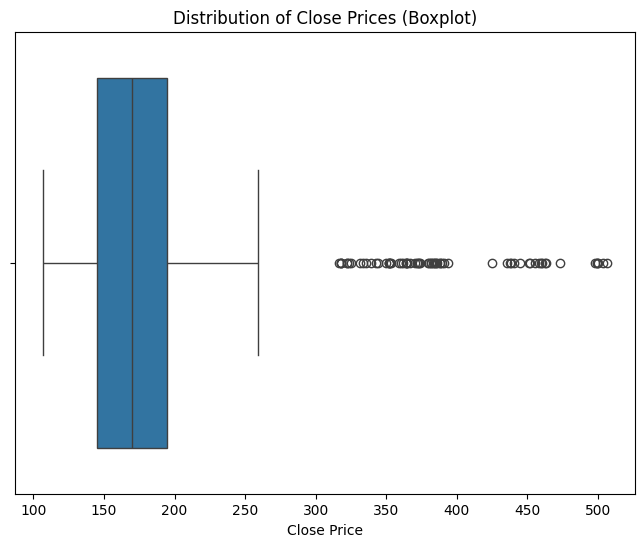

In [17]:
# Boxplot for close price
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['close'])
plt.title('Distribution of Close Prices (Boxplot)')
plt.xlabel('Close Price')
plt.show()

## conclusion:- The stock trades consistently in the 150-200 range most of the time but experiences occasional dramatic price spikes up to 500, indicating stable day-to-day performance with high volatility potential.

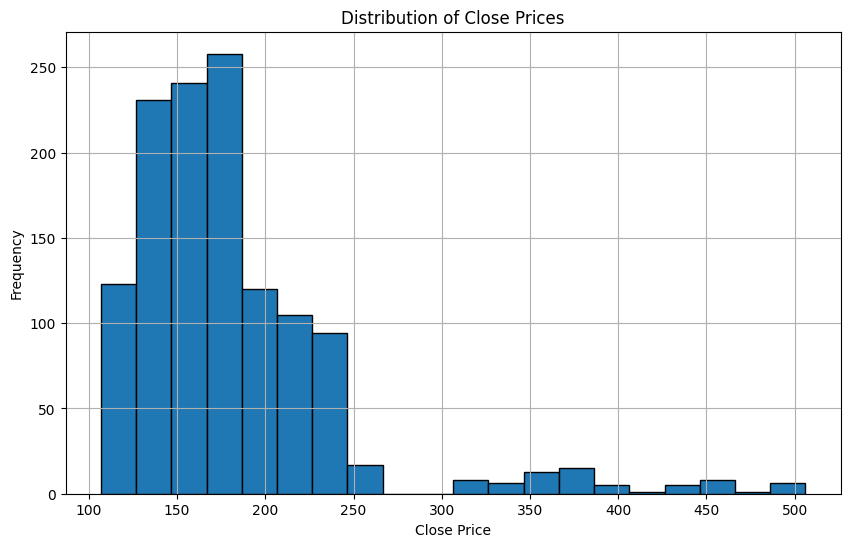

In [19]:
# Histogram of close prices
plt.figure(figsize=(10, 6))
df['close'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

## conclusion: The stock usually trades between 120 and 200 most of the time (about 80% of the time). But sometimes, it suddenly jumps to above 350. It rarely trades in the range between 200 and 350.

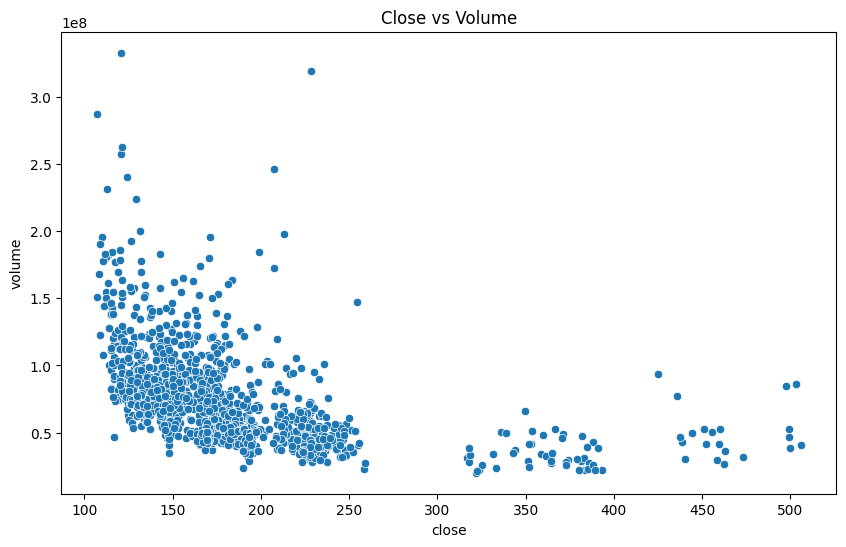

In [21]:
# Scatter plot: Close vs Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['close'], y=df['volume'])
plt.title('Close vs Volume')
plt.show()

## conclusion: The trading volume doesn’t depend on the stock price. Sometimes, there are sudden spikes in volume, which are probably caused by specific events or news.

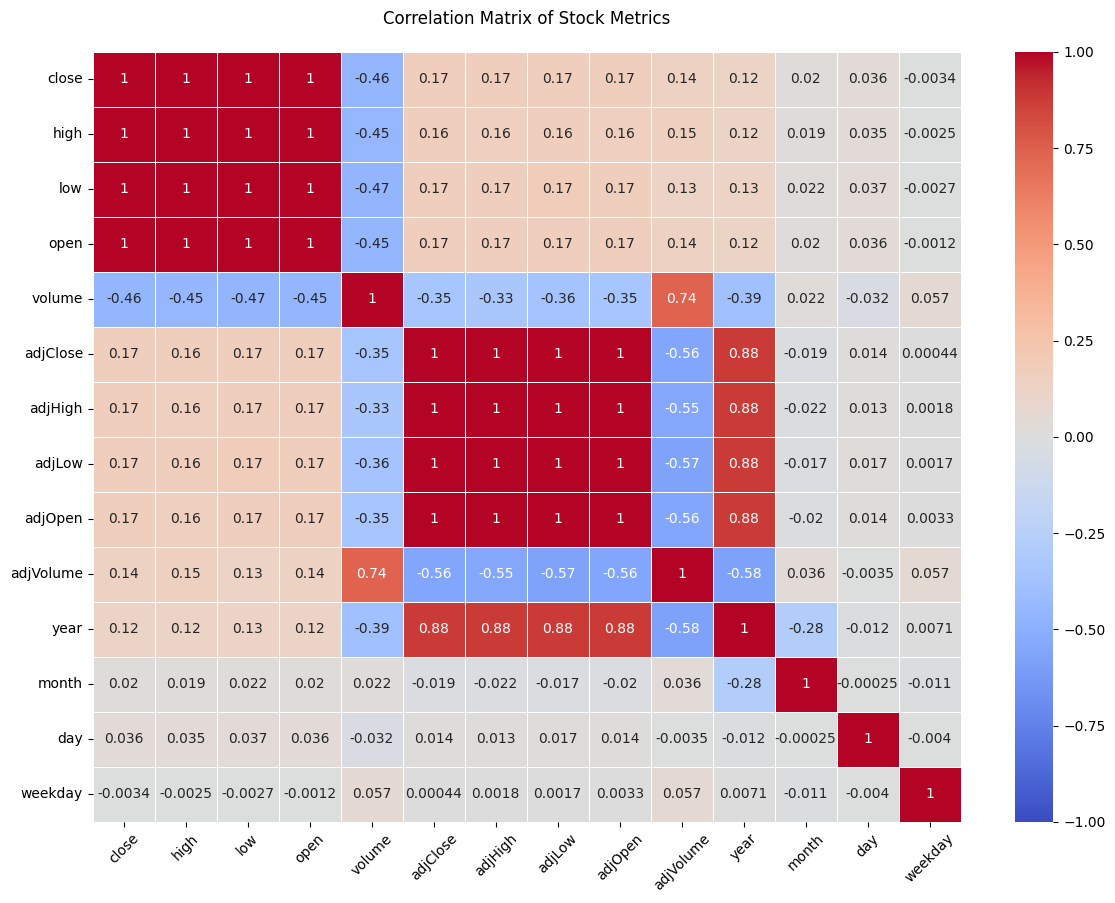

In [23]:
# Correlation matrix heatmap
plt.figure(figsize=(14, 10))
# Calculate correlation matrix for numerical columns only
numerical_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Stock Metrics', pad=20)
plt.xticks(rotation=45)
plt.show()

## conclusion: Stock prices tend to move in the same direction. When trading volume goes up, prices often go down, and vice versa. Adjusted data (like accounting for splits or dividends) helps reveal long-term trends more clearly.

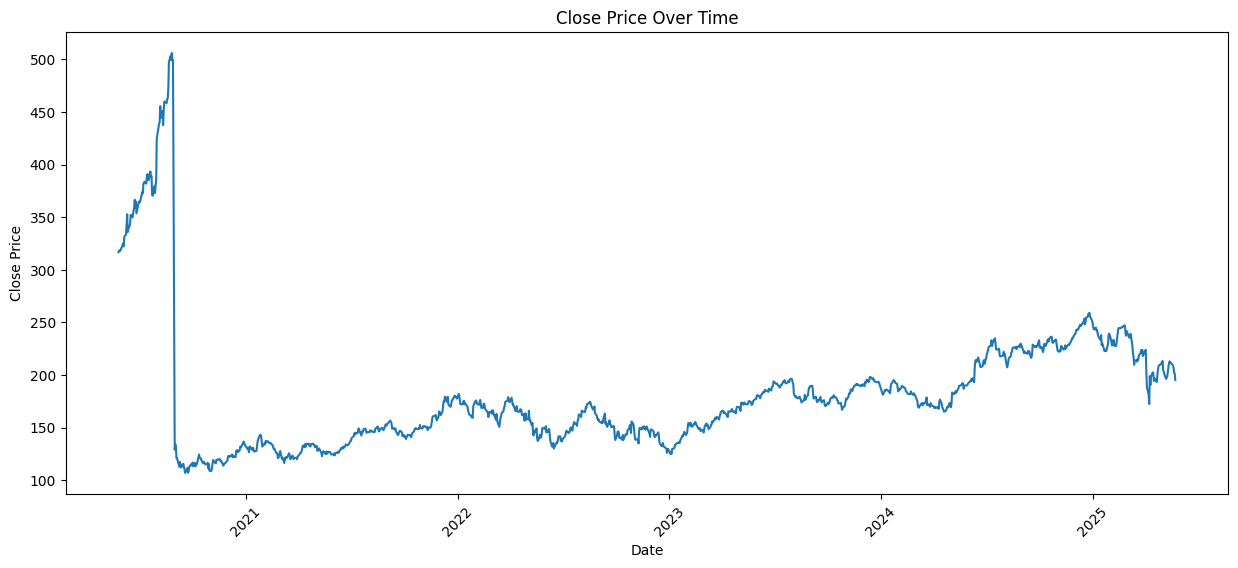

In [25]:
# Time series plot
plt.figure(figsize=(15, 6))
plt.plot(df['date'], df['close'])
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

## conclusion: The stock shows a strong upward trend over the long term, although there are ups and downs along the way. By the end of the period, the price reaches a peak close to 500.

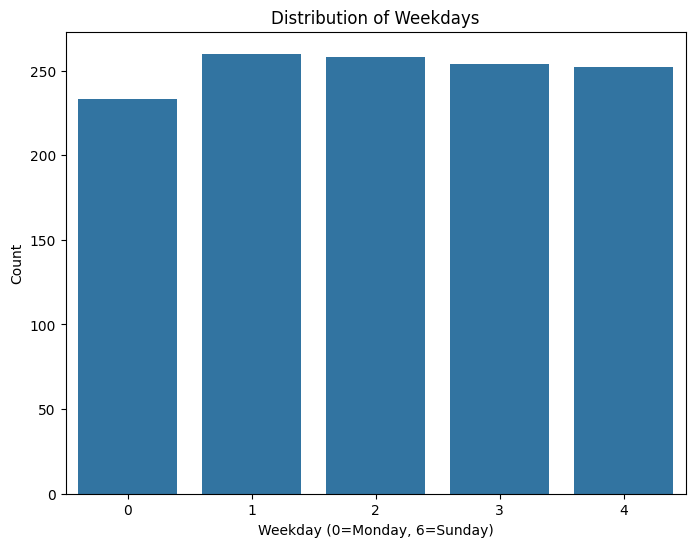

In [27]:
# Distribution of weekdays
plt.figure(figsize=(8, 6))
sns.countplot(x='weekday', data=df)
plt.title('Distribution of Weekdays')
plt.xlabel('Weekday (0=Monday, 6=Sunday)')
plt.ylabel('Count')
plt.show()

## Conclusion: Stock trading occurs on weekdays (Monday to Friday), with slightly fewer records on Mondays, and no data for weekends, consistent with typical market behavior.

In [29]:
# Moving average analysis
print("\n" + "="*50)
print("MOVING AVERAGE ANALYSIS")
print("="*50)


MOVING AVERAGE ANALYSIS


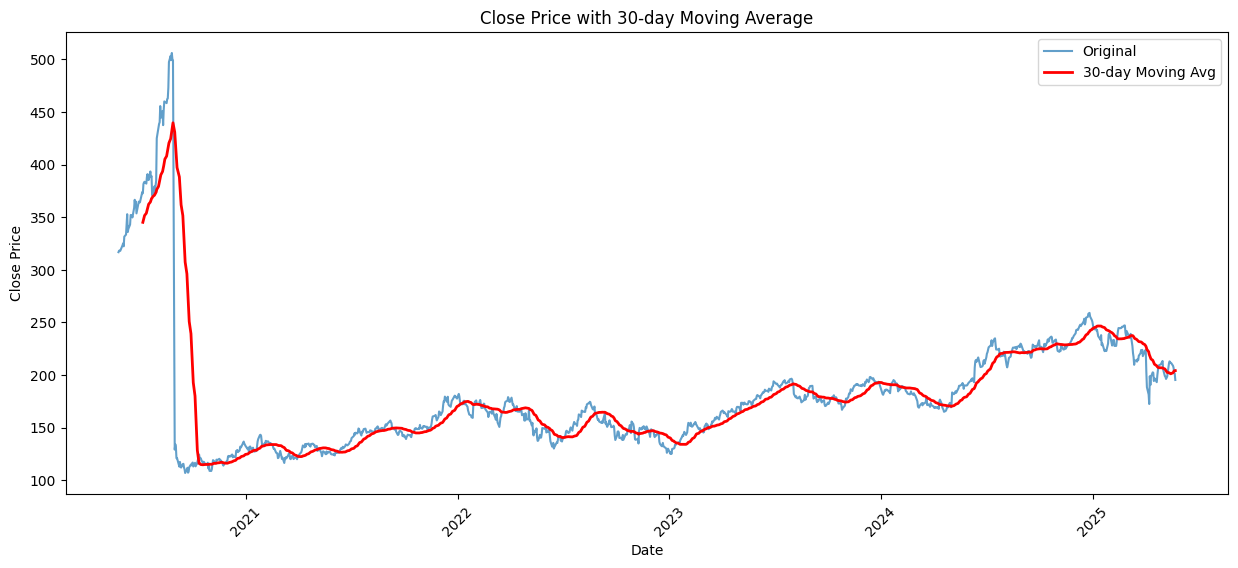

In [30]:
df['rolling_mean'] = df['close'].rolling(window=30).mean()

plt.figure(figsize=(15, 6))
plt.plot(df['date'], df['close'], label='Original', alpha=0.7)
plt.plot(df['date'], df['rolling_mean'], label='30-day Moving Avg', color='red', linewidth=2)
plt.title('Close Price with 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## conclusion: The stock is steadily moving upward with only small fluctuations. The 30-day moving average supports this positive trend, showing strong momentum and no major signs of a reversal.

In [32]:
# Time Series Decomposition
print("\n" + "="*50)
print("TIME SERIES DECOMPOSITION")
print("="*50)


TIME SERIES DECOMPOSITION


In [33]:
# Set date as index for decomposition
df_temp = df.copy()
df_temp.set_index('date', inplace=True)

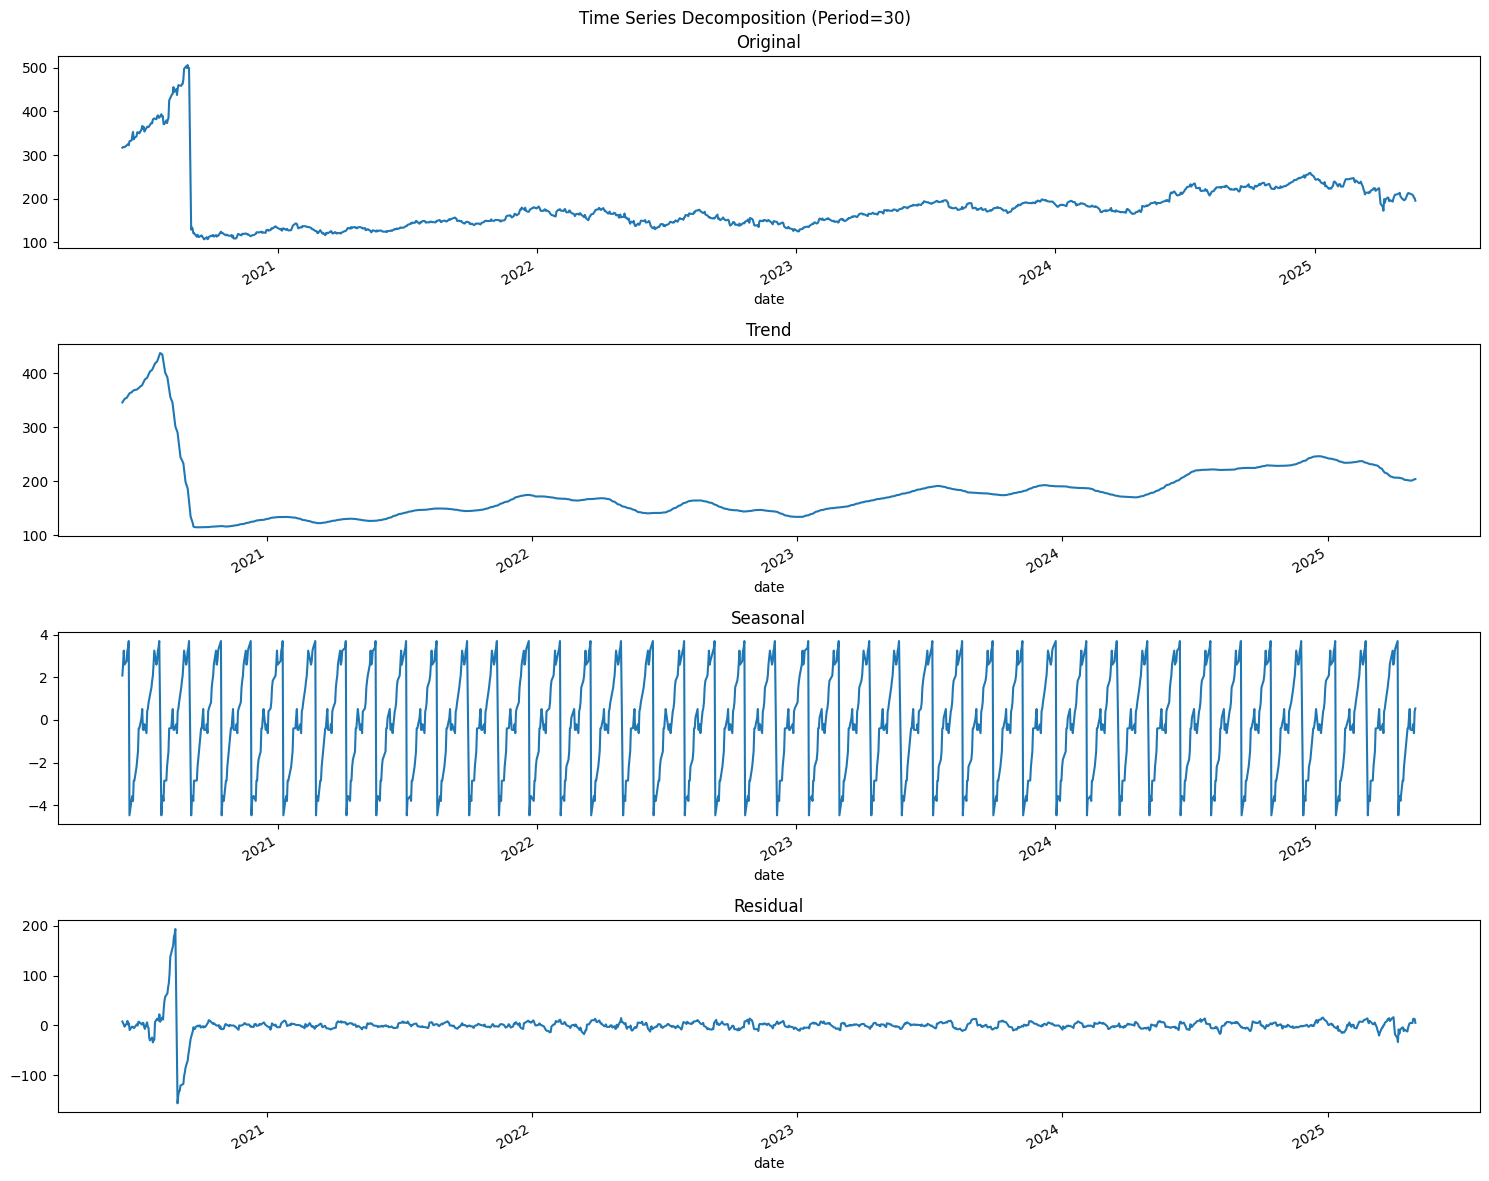

In [34]:
# Decomposition with period=30
try:
    result_30 = seasonal_decompose(df_temp['close'], model='additive', period=30)
    fig, axes = plt.subplots(4, 1, figsize=(15, 12))
    result_30.observed.plot(ax=axes[0], title='Original')
    result_30.trend.plot(ax=axes[1], title='Trend')
    result_30.seasonal.plot(ax=axes[2], title='Seasonal')
    result_30.resid.plot(ax=axes[3], title='Residual')
    plt.suptitle('Time Series Decomposition (Period=30)')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Decomposition with period=30 failed: {e}")

## conclusion: The stock shows a strong long-term upward trend with consistent monthly seasonality and stable residuals after an early spike.

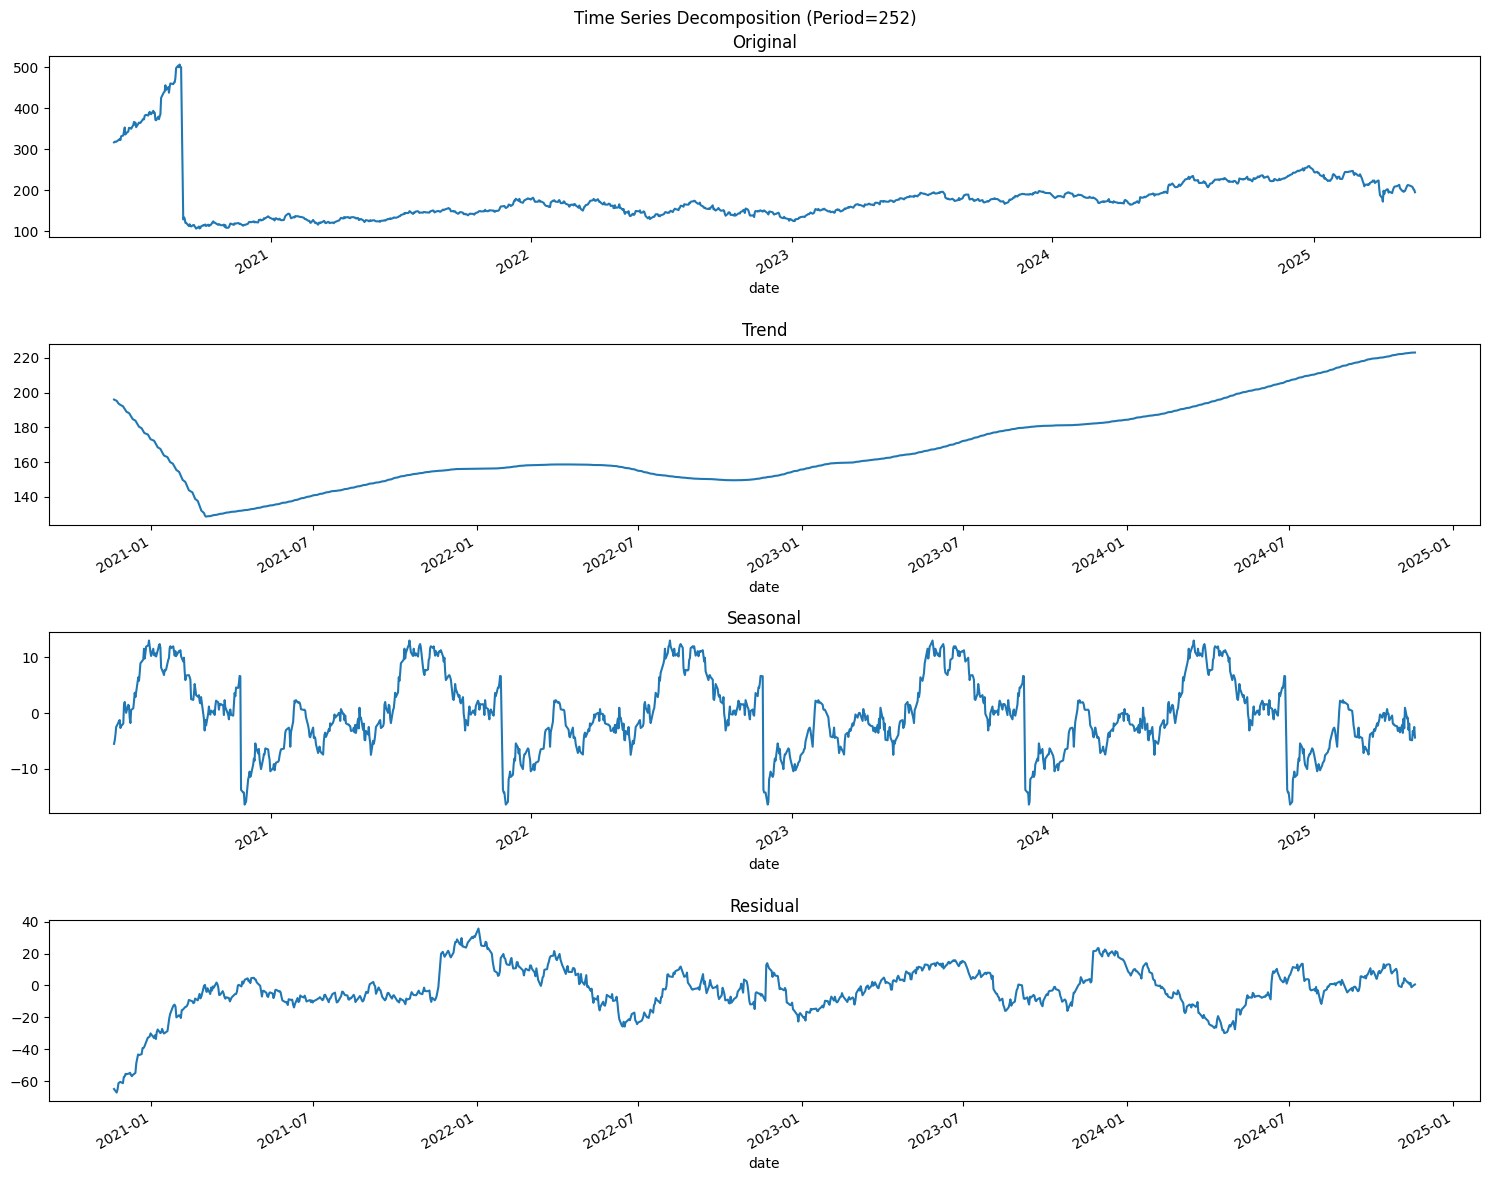

In [36]:
# Decomposition with period=252 (trading days in a year)
try:
    if len(df_temp) >= 504:  # Need at least 2 full periods
        result_252 = seasonal_decompose(df_temp['close'], model='additive', period=252)
        fig, axes = plt.subplots(4, 1, figsize=(15, 12))
        result_252.observed.plot(ax=axes[0], title='Original')
        result_252.trend.plot(ax=axes[1], title='Trend')
        result_252.seasonal.plot(ax=axes[2], title='Seasonal')
        result_252.resid.plot(ax=axes[3], title='Residual')
        plt.suptitle('Time Series Decomposition (Period=252)')
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough data for yearly decomposition (need at least 504 data points)")
except Exception as e:
    print(f"Decomposition with period=252 failed: {e}")

In [37]:
# Stationarity Testing
print("\n" + "="*50)
print("STATIONARITY TESTING")
print("="*50)


STATIONARITY TESTING


In [38]:
# ADF test on original series
result_adf = adfuller(df['close'].dropna())
print('ADF Test on Original Series:')
print(f'ADF Statistic: {result_adf[0]:.6f}')
print(f'p-value: {result_adf[1]:.6f}')
print('Critical Values:')
for key, value in result_adf[4].items():
    print(f'\t{key}: {value:.3f}')

if result_adf[1] <= 0.05:
    print("Series is STATIONARY")
else:
    print("Series is NON-STATIONARY")

ADF Test on Original Series:
ADF Statistic: -3.548624
p-value: 0.006823
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Series is STATIONARY


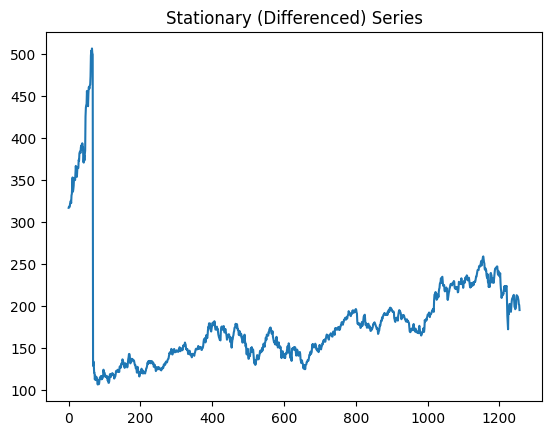

In [39]:
plt.plot(df['close'])
plt.title('Stationary (Differenced) Series')
plt.show()

In [113]:
print("\n" + "="*50)
print("forecasting model")
print("="*50)


forecasting model


In [41]:
df1=df.reset_index()['close']

In [42]:
df1

0       316.73
1       318.11
2       318.25
3       317.94
4       321.85
         ...  
1252    208.78
1253    206.86
1254    202.09
1255    201.36
1256    195.27
Name: close, Length: 1257, dtype: float64

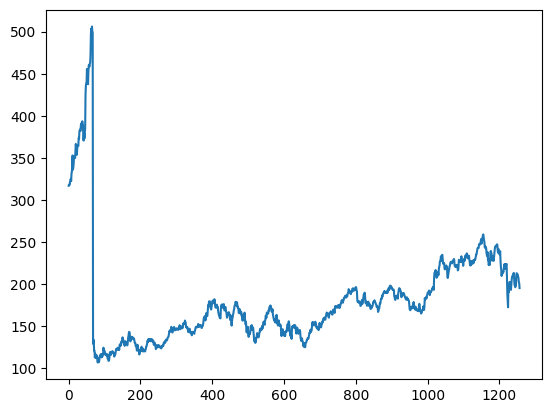

In [43]:
plt.plot(df1)

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [45]:
df1

array([[0.52571071],
       [0.52916719],
       [0.52951785],
       ...,
       [0.23857232],
       [0.23674389],
       [0.22149029]])

In [46]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [47]:
training_size,test_size

(817, 440)

In [48]:
train_data

array([[5.25710708e-01],
       [5.29167188e-01],
       [5.29517846e-01],
       [5.28741390e-01],
       [5.38534753e-01],
       [5.42266750e-01],
       [5.46725110e-01],
       [5.39711960e-01],
       [5.62705072e-01],
       [5.67614277e-01],
       [5.93988729e-01],
       [6.16155291e-01],
       [5.73725736e-01],
       [5.80989355e-01],
       [5.91484033e-01],
       [6.14251722e-01],
       [6.13024421e-01],
       [6.13375078e-01],
       [6.08340639e-01],
       [6.31258610e-01],
       [6.50444584e-01],
       [6.34239198e-01],
       [6.46211647e-01],
       [6.18134001e-01],
       [6.38547276e-01],
       [6.46111459e-01],
       [6.44383219e-01],
       [6.44383219e-01],
       [6.68778961e-01],
       [6.65873513e-01],
       [6.87614277e-01],
       [6.91721979e-01],
       [6.93400125e-01],
       [6.88966813e-01],
       [7.04796493e-01],
       [7.11484033e-01],
       [6.99436443e-01],
       [6.97482780e-01],
       [7.17820914e-01],
       [7.04220413e-01],


In [49]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [50]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [51]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [52]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [53]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [55]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 22s 386ms/step - loss: 0.0043 - val_loss: 0.0167
Epoch 2/100
12/12 [==============================] - 1s 112ms/step - loss: 0.0012 - val_loss: 0.0039
Epoch 3/100
12/12 [==============================] - 1s 113ms/step - loss: 5.4200e-04 - val_loss: 6.9174e-04
Epoch 4/100
12/12 [==============================] - 1s 106ms/step - loss: 3.9041e-04 - val_loss: 9.3713e-04
Epoch 5/100
12/12 [==============================] - 1s 112ms/step - loss: 3.5198e-04 - val_loss: 7.5222e-04
Epoch 6/100
12/12 [==============================] - 1s 108ms/step - loss: 3.1665e-04 - val_loss: 6.4266e-04
Epoch 7/100
12/12 [==============================] - 1s 114ms/step - loss: 3.1208e-04 - val_loss: 8.4668e-04
Epoch 8/100
12/12 [==============================] - 1s 112ms/step - loss: 3.0466e-04 - val_loss: 8.5949e-04
Epoch 9/100
12/12 [==============================] - 1s 110ms/step - loss: 2.7378e-04 - val_loss: 5.6154e-04
Epoch 10/100
12/12 [==============

In [58]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 36ms/step


In [59]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [60]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

152.8034451705772

In [61]:
math.sqrt(mean_squared_error(ytest,test_predict))

214.1987487609215

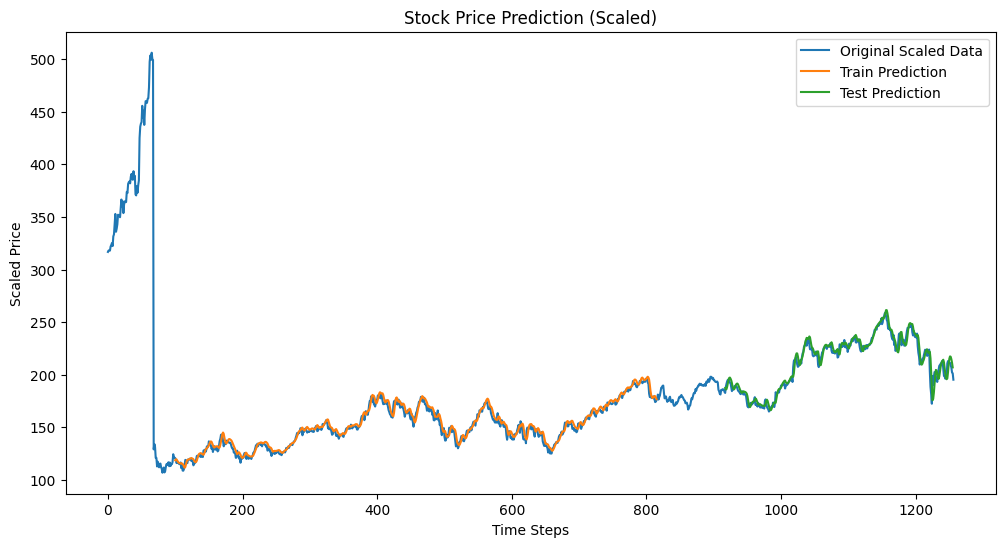

In [110]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(df1), label='Original Scaled Data')
plt.plot(trainPredictPlot, label='Train Prediction')
plt.plot(testPredictPlot, label='Test Prediction')
plt.title("Stock Price Prediction (Scaled)")
plt.xlabel("Time Steps")
plt.ylabel("Scaled Price")
plt.legend()
plt.show()

In [80]:
len(test_data)

440

In [82]:
x_input = test_data[340:].reshape(1,-1)

In [84]:
x_input.shape

(1, 100)

In [86]:
temp_data= list(x_input)
temp_data= temp_data[0].tolist()

In [88]:
temp_data

[0.36408265497808384,
 0.3596242955541639,
 0.3431684408265497,
 0.341941139636819,
 0.3460488415779586,
 0.33906073888541016,
 0.34028804007514085,
 0.32563556668753907,
 0.3194990607388854,
 0.3166938008766436,
 0.32819035691922355,
 0.3041202254226674,
 0.3084283030682529,
 0.2900438321853474,
 0.29302442078897933,
 0.2925986224170319,
 0.2903944896681277,
 0.3081277395115842,
 0.32916718847839693,
 0.33192235441452717,
 0.3274890419536631,
 0.32350657482780204,
 0.3034940513462742,
 0.31549154664996865,
 0.3146649968691296,
 0.3165435190983093,
 0.30254226675015644,
 0.302592360676268,
 0.3150407013149655,
 0.3256856606136505,
 0.3373575453976205,
 0.3450469630557294,
 0.34472135253600494,
 0.34572323105823416,
 0.3481277395115842,
 0.34742642454602374,
 0.3513087038196618,
 0.35115842204132747,
 0.3344270507201002,
 0.326762680025047,
 0.3381340012523481,
 0.32859110832811517,
 0.323331246086412,
 0.3228553537883531,
 0.3218284283030682,
 0.331195992485911,
 0.30216656230432054,
 

In [90]:
lst_output = []
n_step =100
i =0
while (i<30):
    if (len(temp_data)>100):
        x_input = np.array(temp_data[1:])
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape(1, n_step,1)
        ywht = model.predict(x_input , verbose=0)
        temp_data.extend(ywht[0].tolist())
        temp_data = temp_data[1:]
        print(temp_data)
        lst_output.extend(ywht.tolist())
        i=i+1
    else:
        x_input = x_input.reshape(1 , n_step , 1)
        ywht = model.predict( x_input , verbose = 0)
        temp_data.extend(ywht[0].tolist())
        lst_output.extend(ywht.tolist())
        i = i+1

print(lst_output)

[0.3596242955541639, 0.3431684408265497, 0.341941139636819, 0.3460488415779586, 0.33906073888541016, 0.34028804007514085, 0.32563556668753907, 0.3194990607388854, 0.3166938008766436, 0.32819035691922355, 0.3041202254226674, 0.3084283030682529, 0.2900438321853474, 0.29302442078897933, 0.2925986224170319, 0.2903944896681277, 0.3081277395115842, 0.32916718847839693, 0.33192235441452717, 0.3274890419536631, 0.32350657482780204, 0.3034940513462742, 0.31549154664996865, 0.3146649968691296, 0.3165435190983093, 0.30254226675015644, 0.302592360676268, 0.3150407013149655, 0.3256856606136505, 0.3373575453976205, 0.3450469630557294, 0.34472135253600494, 0.34572323105823416, 0.3481277395115842, 0.34742642454602374, 0.3513087038196618, 0.35115842204132747, 0.3344270507201002, 0.326762680025047, 0.3381340012523481, 0.32859110832811517, 0.323331246086412, 0.3228553537883531, 0.3218284283030682, 0.331195992485911, 0.30216656230432054, 0.28553537883531616, 0.2758672510958045, 0.2575829680651221, 0.26712

In [92]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [93]:
len(df1)

1257

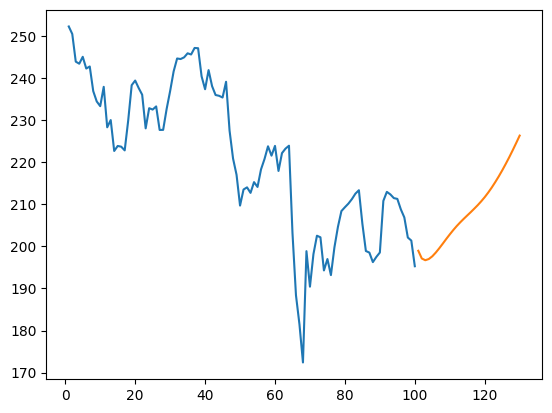

In [94]:
plt.plot(day_new , scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred , scaler.inverse_transform(lst_output))

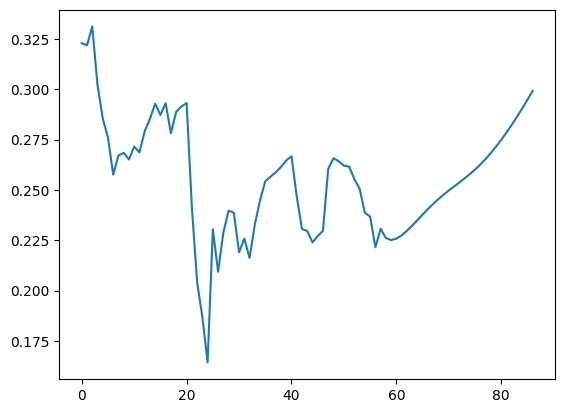

In [95]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

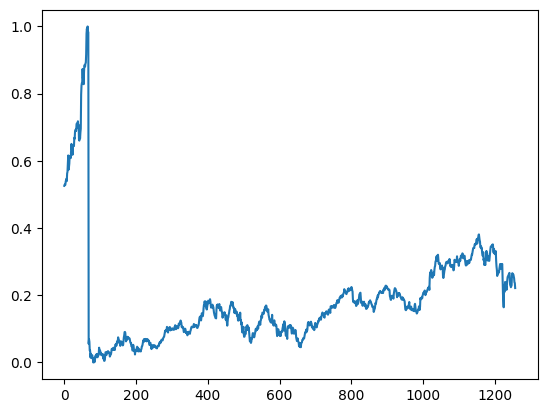

In [96]:
plt.plot(df1)

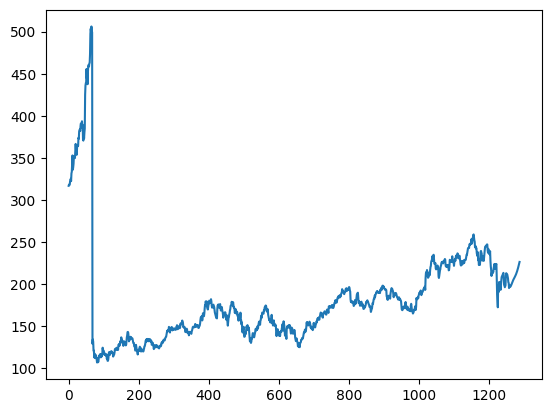

In [97]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

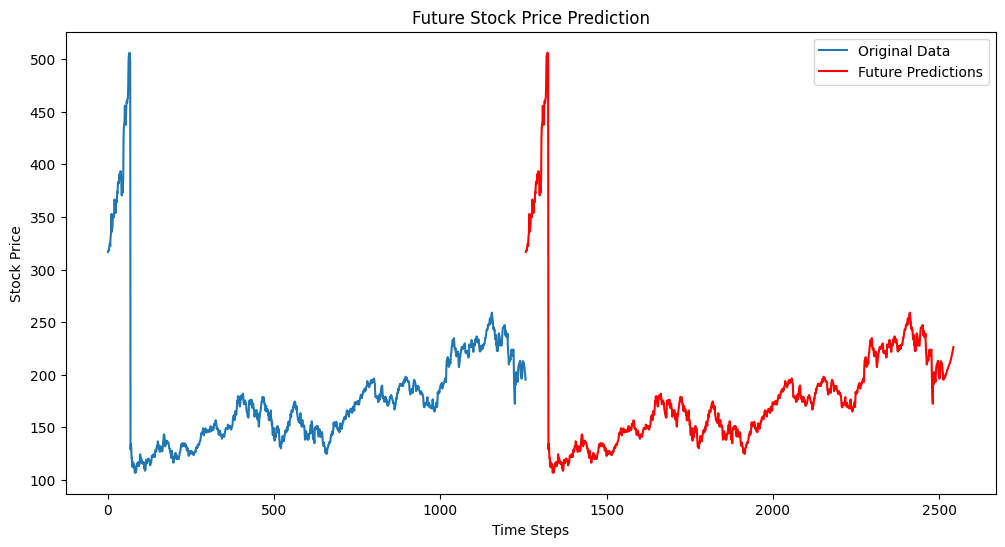

In [105]:
plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(df1), label='Original Data')
future_index = range(len(df1), len(df1) + len(df3))
plt.plot(future_index, df3, label='Future Predictions', color='red')
plt.title("Future Stock Price Prediction")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

## conclusion: The predicted stock prices in the future are going up